In [1]:
# loading necessary library
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import math
import numpy as np
import random

In [2]:
# Creating dataset
random.seed(0)
list_1 = ['investment period 1', 'investment period 2', 'investment period 3', 'investment period 4', 'investment period 5', 'investment period 6', 
          'investment period 7', 'investment period 8', 'investment period 9', 'investment period 10']
# list_1 = ['investment period 1', 'investment period 2', 'investment period 3', 'investment period 4', 'investment period 5']
list_2 = []
for i in range(5):
    list_2.append(str(i + 1))  
list_3 = ['s', 'b', 'mf']

import random
def original():
    dictionary = {}
    for element_1 in list_1:
        dictionary[element_1] = {}
        for element_2 in list_2:
            dictionary[element_1][element_2]={}
            for element_3 in list_3:
                dictionary[element_1][element_2][element_3] = round(random.uniform(1, 1.3),2)
                
    return dictionary

In [3]:
returns = original()

In [4]:
# print purpose
print('Dataset')
print('=======')
for key, value in returns.items():
    print(key)
    for k,v in returns[key].items():
        
        print(k, ' : ', v)

Dataset
investment period 1
1  :  {'s': 1.25, 'b': 1.23, 'mf': 1.13}
2  :  {'s': 1.08, 'b': 1.15, 'mf': 1.12}
3  :  {'s': 1.24, 'b': 1.09, 'mf': 1.14}
4  :  {'s': 1.18, 'b': 1.27, 'mf': 1.15}
5  :  {'s': 1.08, 'b': 1.23, 'mf': 1.19}
investment period 2
1  :  {'s': 1.08, 'b': 1.27, 'mf': 1.29}
2  :  {'s': 1.24, 'b': 1.27, 'mf': 1.09}
3  :  {'s': 1.22, 'b': 1.27, 'mf': 1.21}
4  :  {'s': 1.14, 'b': 1.03, 'mf': 1.13}
5  :  {'s': 1.18, 'b': 1.27, 'mf': 1.29}
investment period 3
1  :  {'s': 1.14, 'b': 1.26, 'mf': 1.08}
2  :  {'s': 1.24, 'b': 1.16, 'mf': 1.0}
3  :  {'s': 1.22, 'b': 1.12, 'mf': 1.25}
4  :  {'s': 1.2, 'b': 1.0, 'mf': 1.15}
5  :  {'s': 1.26, 'b': 1.07, 'mf': 1.1}
investment period 4
1  :  {'s': 1.26, 'b': 1.06, 'mf': 1.17}
2  :  {'s': 1.07, 'b': 1.29, 'mf': 1.24}
3  :  {'s': 1.13, 'b': 1.02, 'mf': 1.1}
4  :  {'s': 1.15, 'b': 1.28, 'mf': 1.03}
5  :  {'s': 1.17, 'b': 1.21, 'mf': 1.16}
investment period 5
1  :  {'s': 1.24, 'b': 1.16, 'mf': 1.29}
2  :  {'s': 1.18, 'b': 1.18, 'mf': 1

In [5]:
def original():
    dictionary = {}
    for element_1 in list_2:
        dictionary[element_1] = 1/len(returns['investment period 1'].keys())
    return dictionary

probs = original()
print(probs)

pos = {}

# for n investment periods change numEpochs to n
numEpochs = 7

# This variable helps to verify number of nodes in the messy situation (for higher numEpochs)
tree_calc = numEpochs

# It's the distance from one investment period to other in the graph (value is not crucial)
horizDist = 12

# used to place high, low situations to the opposite direction
slopes = [-2,-1,0,1,2]

{'1': 0.2, '2': 0.2, '3': 0.2, '4': 0.2, '5': 0.2}


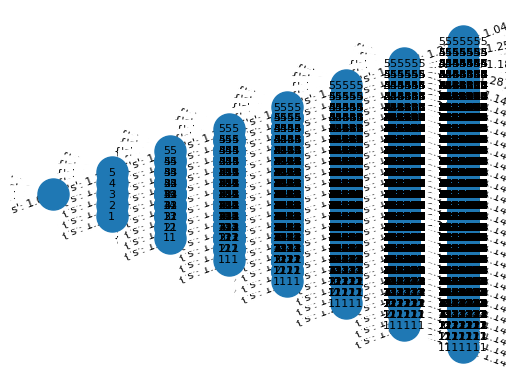

In [6]:
# root is "", t is for , j is for the investment period
def buildGraph(G, root, t, j):
    newX = pos[root][0] + horizDist
    yBase = pos[root][1]
    
    index = 0

    # # for r in returns:
    # print('{}'.format(r))
    # print("_______________")
    for i in returns['investment period ' + str(j)].keys():
        # print('H/L: ',i)
        newNode = root + i
        # print('newnode:',newNode)
        G.add_edge(root, newNode, p = probs[i], returns = returns['investment period ' + str(j)][i])
        G.add_node(newNode)
        pos[newNode] = [newX, yBase + horizDist*slopes[index]]
        # pos[newNode] = [newX, yBase + horizDist*next(alternator)]
        if t < numEpochs - 1:
            buildGraph(G, newNode, t + 1, j + 1)
        index += 1

G = nx.DiGraph()
G.add_node("")
pos[""] = [0, 0]
buildGraph(G, "", 0, 1)

edge_labels = nx.get_edge_attributes(G,'returns')
plt.figure()
nx.draw_networkx(G,pos,node_size=500, font_size = 8)
nx.draw_networkx_edge_labels(G,pos,edge_labels, font_size = 8)
plt.axis('off')
plt.show()

In [7]:
# number of nodes including "" at the very beginning
len(list(G.nodes))

97656

In [8]:
# to verify number of nodes mathematically
import math
sum = 1
numEpochs = tree_calc
for i in range(numEpochs):
    sum = sum + math.pow(len(returns['investment period 1'].keys()), numEpochs)
    numEpochs -= 1
print(sum)

97656.0


In [9]:
 #list(G.edges)

# Gurobi Code

In [10]:
import gurobipy as gp
from gurobipy import GRB
import itertools

def getPredNode(G, node):
    return [pred for pred in G.predecessors(node)][0]

def getReturn(G, node, i):
    value = ''
    # j = 'time horizon ' + str(j)
    for u, v, data in G.in_edges(node, data = True):
        value = data['returns'][i]
        
    return value

investments = ['s', 'b', 'mf']

## currently, G.out_degree(x) == 5 since we have 5 scenarios exiting each node
branchNodes = [x for x in G.nodes() if G.out_degree(x)==5 and G.in_degree(x)==1]

decisionNodes = branchNodes + ['']
leafNodes = [x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)==1]
p = 1/len(leafNodes)

    
try:
    m = gp.Model("Financial Planning - Decision Tree Model")
    
    x = m.addVars(itertools.product(investments, decisionNodes), name = "invest")
 
    y = m.addVars(leafNodes, name = "excess")
    w = m.addVars(leafNodes, name = "shortage")
    
    m.setObjective(p * gp.quicksum([y[l] - 4*w[l] for l in leafNodes]), GRB.MAXIMIZE)

    m.addConstr(x.sum('*',"") <= 30, "investAmountAtNode['0']")
    m.addConstrs((x.sum('*', n) == gp.quicksum([getReturn(G, n, i)*x[i, getPredNode(G,n)] for i in investments]) for n in branchNodes), "investAmountAtNode")
    m.addConstrs((200 == gp.quicksum([getReturn(G, l, i)*x[i, getPredNode(G,l)] for i in investments]) - y[l] + w[l] for l in leafNodes), "final")
    
    m.write('financial_plan_with_10_investment_periods.lp')
    
except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))
except AttributeError:
    print('Encountered an attribute error')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-20


In [11]:
# !cat financial_plan_with_10_investment_periods.lp

In [12]:
try:
    
    m.optimize()
    
    for v in m.getVars(): print('%s %g' % (v.VarName, v.X))

    print('Obj: %g' % m.ObjVal)
   
    # print("invest s,1", investments[0],decisionNodes[0])
    
except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))
except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 97656 rows, 214843 columns and 507808 nonzeros
Model fingerprint: 0x868d1925
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-05, 5e-05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 2e+02]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve time: 0.56s
Presolved: 97656 rows, 214843 columns, 507808 nonzeros

Ordering time: 0.03s

Barrier performed 0 iterations in 0.97 seconds (0.45 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Solved in 3256 iterations and 0.97 seconds (0.54 work units)
Optimal objective -3.788951585e+02
invest[s,1] 0
invest[s,11] 46.863
invest[s,111] 0
invest[s,1111] 56.6292
invest[s,11111] 0
invest[s,111111] 88.4775
invest[s,111112] 89.1797
invest[s,11

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



# The section below involves appying the SAA method - 
# next we attempted to run multiple samples of the stochastic problem above to obtain average objective function (which is equivalent to the Upper Bound)

In [13]:
keys = list(returns.keys())
print(keys)

['investment period 1', 'investment period 2', 'investment period 3', 'investment period 4', 'investment period 5', 'investment period 6', 'investment period 7', 'investment period 8', 'investment period 9', 'investment period 10']


In [14]:
list_1 = keys
list_2 = []
for i in range(10):
    list_2.append(str(i + 1))  
list_3 = ['s', 'b', 'mf']


In [15]:
import random
random.seed(1)
def original():
    dico = {}
    for element_1 in list_1:
        dico[element_1] = {}
        for element_2 in list_2:
            dico[element_1][element_2]={}
            for element_3 in list_3:
                dico[element_1][element_2][element_3] = random.uniform(1, 1.3)
                
    return dico

In [16]:
saa_d = original()

# Now let’s compute several lower bound samples to compute an overall expected mean lower bound and standard deviation. ---- This code needs to be developed

In [17]:
import itertools
import gurobipy as gp
from gurobipy import GRB
import itertools


def solveRestrictedProblem(saa_d):
    try:
        # print(len(saa_d))
        def original():
            dico = {}
            for element_1 in list_2:
                dico[element_1] = 1/len(saa_d)
            return dico

        probs = original()
        pos = {}

        # for n investment periods change numEpochs to n
        numEpochs = 5

        # This variable helps to verify number of nodes in the messy situation (for higher numEpochs)
        tree_calc = numEpochs

        # It's the distance from one investment period to other in the graph (value is not crucial)
        horizDist = 12

        # used to place high, low situations to the opposite direction
        range_lb = - int((len(saa_d['investment period 1'].keys())/2))
        # print(range_lb)
        range_ub = int((len(saa_d['investment period 1'].keys()) + 1)/2)
        # print(range_ub)
        
        
        slopes = list(range(range_lb, range_ub))
        # print(slopes)
        
        
        
        def buildGraph(G, root, t, j):
            newX = pos[root][0] + horizDist
            yBase = pos[root][1]

            index = 0

            # # for r in returns:
            # print('{}'.format(r))
            # print("_______________")
            for i in saa_d['investment period ' + str(j)].keys():
                # print('H/L: ',i)
                newNode = root + i
                # print('newnode:',newNode)
                G.add_edge(root, newNode, p = probs[i], returns = saa_d['investment period ' + str(j)][i])
                G.add_node(newNode)
                pos[newNode] = [newX, yBase + horizDist*slopes[index]]
                # pos[newNode] = [newX, yBase + horizDist*next(alternator)]
                if t < numEpochs - 1:
                    buildGraph(G, newNode, t + 1, j + 1)
                index += 1

        G = nx.DiGraph()
        G.add_node("")
        pos[""] = [0, 0]
        buildGraph(G, "", 0, 1)

        edge_labels = nx.get_edge_attributes(G,'returns')
        # print(edge_labels)
        plt.figure()
        nx.draw_networkx(G,pos,node_size=500, font_size = 8)
        nx.draw_networkx_edge_labels(G,pos,edge_labels, font_size = 8)
        plt.axis('off')
        plt.show()
     


        def getPredNode(G, node):
            # print([pred for pred in G.predecessors(node)][0])
            return [pred for pred in G.predecessors(node)][0]

        def getReturn(G, node, i):
            value = ''
            # j = 'time horizon ' + str(j)
            for u, v, data in G.in_edges(node, data = True):
                value = data['returns'][i]

            return value

        investments = ['s', 'b', 'mf']

        ## currently, G.out_degree(x) == 5 since we have 5 scenarios exiting each node
        branchNodes = [x for x in G.nodes() if G.out_degree(x)== len(saa_d['investment period 1'].keys()) and G.in_degree(x)==1]
        # print(branchNodes)

        decisionNodes = branchNodes + ['']
        leafNodes = [x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)==1]
        p = 1/len(leafNodes)


        try:
            m = gp.Model("Financial Planning - Decision Tree Model")

            x = m.addVars(itertools.product(investments, decisionNodes), name = "invest")
            # print(x)

            y = m.addVars(leafNodes, name = "excess")
            w = m.addVars(leafNodes, name = "shortage")

            m.setObjective(p * gp.quicksum([y[l] - 4*w[l] for l in leafNodes]), GRB.MAXIMIZE)

            m.addConstr(x.sum('*',"") <= 30, "investAmountAtNode['0']")
            m.addConstrs((x.sum('*', n) == gp.quicksum([getReturn(G, n, i)*x[i, getPredNode(G,n)] for i in investments]) for n in branchNodes), "investAmountAtNode")
            m.addConstrs((200 == gp.quicksum([getReturn(G, l, i)*x[i, getPredNode(G,l)] for i in investments]) - y[l] + w[l] for l in leafNodes), "final")

            m.write('financial_plan_with_10_investment_periods.lp')
            m.optimize()
            m.write('test.sol')
        except gp.GurobiError as e:
            print('Error code ' + str(e.errno) + ': ' + str(e))

        except AttributeError:
            print('Encountered an attribute error')

    except gp.GurobiError as e:
        print('Error code ' + str(e.errno) + ': ' + str(e))

    except AttributeError:
        print('Encountered an attribute error')
    # for v in m.getVars(): 
    #     print('%s %g' % (v.VarName, v.X))
        # print(len(m.getVars()))
        # print()
        
    # invested = v.X
    # print(invested)

    return m.ObjVal

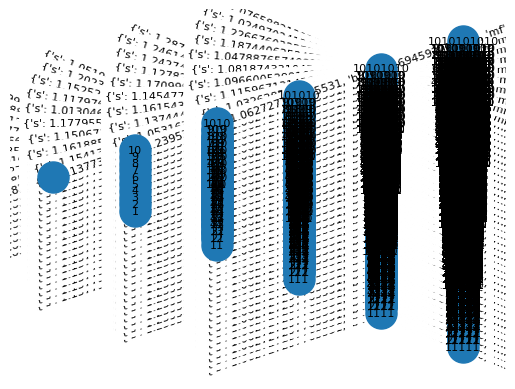

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 111111 rows, 233333 columns and 566663 nonzeros
Model fingerprint: 0x0e18b869
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-05, 4e-05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 2e+02]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve time: 0.99s
Presolved: 111111 rows, 233333 columns, 566663 nonzeros

Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 6.111e+05
 Factor NZ  : 7.549e+05 (roughly 140 MB of memory)
 Factor Ops : 6.204e+06 (less than 1 second per iteration)
 Threads    : 6

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -5.53636241e+03 -0.00000000e+00  2.66e+03 5.12e-03  1.78e+02     2s

Barrier performed 0 iterations

In [18]:
print(solveRestrictedProblem(saa_d))

In [19]:
list_1 = ['investment period 1', 'investment period 2', 'investment period 3', 'investment period 4', 'investment period 5', 'investment period 6', 
          'investment period 7', 'investment period 8', 'investment period 9', 'investment period 10']
list_2 = []
for i in range(10):
    list_2.append(str(i + 1))  
list_3 = ['s', 'b', 'mf']





In [20]:
import random
random.seed(12)
def original():
    dico = {}
    for element_1 in list_1:
        dico[element_1] = {}
        for element_2 in list_2:
            dico[element_1][element_2]={}
            for element_3 in list_3:
                dico[element_1][element_2][element_3] = round(random.uniform(1, 1.3),2)
                
    return dico

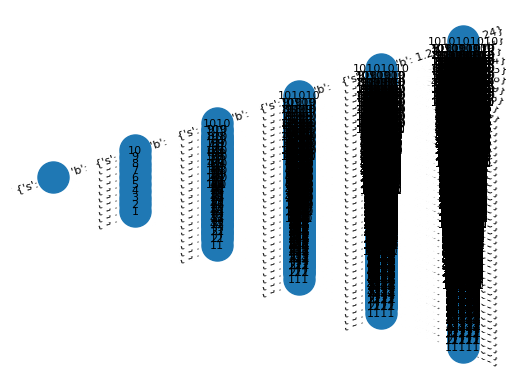

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 111111 rows, 233333 columns and 566663 nonzeros
Model fingerprint: 0x1cb81a52
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-05, 4e-05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 2e+02]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve time: 1.70s
Presolved: 111111 rows, 233333 columns, 566663 nonzeros

Ordering time: 0.03s

Barrier statistics:
 AA' NZ     : 6.111e+05
 Factor NZ  : 7.549e+05 (roughly 140 MB of memory)
 Factor Ops : 6.204e+06 (less than 1 second per iteration)
 Threads    : 6

Barrier performed 0 iterations in 2.42 seconds (0.45 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Solved in 0 iterations and 2.46 seconds (0.78 work units)
Optimal objective

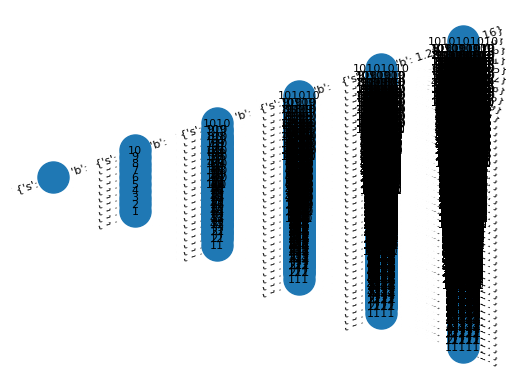

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 111111 rows, 233333 columns and 566663 nonzeros
Model fingerprint: 0xaa7594ce
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-05, 4e-05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 2e+02]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve time: 1.95s
Presolved: 111111 rows, 233333 columns, 566663 nonzeros

Ordering time: 0.07s

Barrier statistics:
 AA' NZ     : 6.111e+05
 Factor NZ  : 7.549e+05 (roughly 140 MB of memory)
 Factor Ops : 6.204e+06 (less than 1 second per iteration)
 Threads    : 6

Barrier performed 0 iterations in 2.93 seconds (0.45 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 11223 iterations and 3.23 seconds (0.78 work units)
Optimal objecti

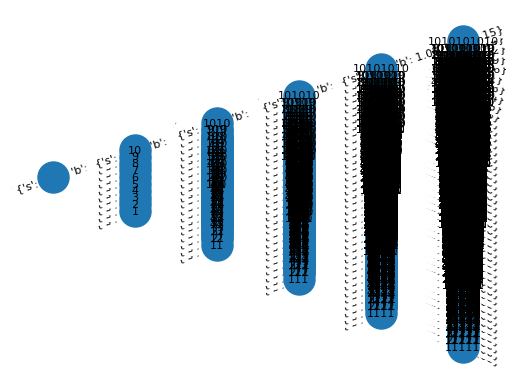

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 111111 rows, 233333 columns and 566663 nonzeros
Model fingerprint: 0xb463ab67
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-05, 4e-05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 2e+02]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve time: 1.38s
Presolved: 111111 rows, 233333 columns, 566663 nonzeros

Ordering time: 0.02s

Barrier statistics:
 AA' NZ     : 6.111e+05
 Factor NZ  : 7.549e+05 (roughly 140 MB of memory)
 Factor Ops : 6.204e+06 (less than 1 second per iteration)
 Threads    : 6

Barrier performed 0 iterations in 1.95 seconds (0.45 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 12228 iterations and 1.96 seconds (0.78 work units)
Optimal objecti

In [21]:
import numpy as np
M = 3
# phaseOneSampleSize = 100
solutions = []
objVals = []
np.random.seed(1)
for i in range(M):
    # d = np.random.poisson(lam = d, size=(phaseOneSampleSize, len(d)))
    d = original()
    # print(len(d['investment period 1'].keys()))
    objVal = solveRestrictedProblem(d)
    # print("Solution:", soln)
    # solutions.append(soln)
    objVals.append(objVal)
    
print("estimated mean of lower bound: ", np.average(objVals))

In [22]:
import statistics
import math
from scipy import stats

CI_lb = stats.t.interval(alpha=0.95, loc=np.mean(objVals), df=len(objVals)-1, scale=stats.sem(objVals))
print('Confidence Interval for lower bound: ', CI_lb)
print('Width for lower bound confidence interval: ', round((CI_lb[1] - CI_lb[0]),2))

Confidence Interval for lower bound:  (-538.772643082695, -537.5834697460256)
Width for lower bound confidence interval:  1.19


In [23]:
# Upper bound

In [24]:
import itertools
import gurobipy as gp
from gurobipy import GRB
import itertools


def getExpectedObjectiveValue(saa_d):
    try:
        print(len(saa_d))
        def original():
            dico = {}
            for element_1 in list_2:
                dico[element_1] = 1/len(saa_d)
            return dico

        probs = original()
        pos = {}

        # for n investment periods change numEpochs to n
        numEpochs = 3

        # This variable helps to verify number of nodes in the messy situation (for higher numEpochs)
        tree_calc = numEpochs

        # It's the distance from one investment period to other in the graph (value is not crucial)
        horizDist = 12

        # used to place high, low situations to the opposite direction
        range_lb = - int((len(saa_d['investment period 1'].keys())/2))
        # print(range_lb)
        range_ub = int((len(saa_d['investment period 1'].keys()) + 1)/2)
        # print(range_ub)
        
        
        slopes = list(range(range_lb, range_ub))
        # print(slopes)
        
        
        
        def buildGraph(G, root, t, j):
            newX = pos[root][0] + horizDist
            yBase = pos[root][1]

            index = 0

            # # for r in returns:
            # print('{}'.format(r))
            # print("_______________")
            for i in saa_d['investment period ' + str(j)].keys():
                # print('H/L: ',i)
                newNode = root + i
                # print('newnode:',newNode)
                G.add_edge(root, newNode, p = probs[i], returns = saa_d['investment period ' + str(j)][i])
                G.add_node(newNode)
                pos[newNode] = [newX, yBase + horizDist*slopes[index]]
                # pos[newNode] = [newX, yBase + horizDist*next(alternator)]
                if t < numEpochs - 1:
                    buildGraph(G, newNode, t + 1, j + 1)
                index += 1

        G = nx.DiGraph()
        G.add_node("")
        pos[""] = [0, 0]
        buildGraph(G, "", 0, 1)

        edge_labels = nx.get_edge_attributes(G,'returns')
        # print(edge_labels)
        plt.figure()
        nx.draw_networkx(G,pos,node_size=500, font_size = 8)
        nx.draw_networkx_edge_labels(G,pos,edge_labels, font_size = 8)
        plt.axis('off')
        plt.show()
     


        def getPredNode(G, node):
            # print([pred for pred in G.predecessors(node)][0])
            return [pred for pred in G.predecessors(node)][0]

        def getReturn(G, node, i):
            value = ''
            # j = 'time horizon ' + str(j)
            for u, v, data in G.in_edges(node, data = True):
                value = data['returns'][i]

            return value

        investments = ['s', 'b', 'mf']

        ## currently, G.out_degree(x) == 5 since we have 5 scenarios exiting each node
        branchNodes = [x for x in G.nodes() if G.out_degree(x)== len(saa_d['investment period 1'].keys()) and G.in_degree(x)==1]
        # print(branchNodes)

        decisionNodes = branchNodes + ['']
        leafNodes = [x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)==1]
        p = 1/len(leafNodes)


        try:
            m = gp.Model("Financial Planning - Decision Tree Model")

            # x = m.addVars(itertools.product(investments, decisionNodes), name = "invest")
            # print(x)

            y = m.addVars(leafNodes, name = "excess")
            w = m.addVars(leafNodes, name = "shortage")

            m.setObjective(p * gp.quicksum([y[l] - 4*w[l] for l in leafNodes]), GRB.MAXIMIZE)

            # m.addConstr(x.sum('*',"") <= 30, "investAmountAtNode['0']")
            m.addConstrs((x.sum('*', n) == gp.quicksum([getReturn(G, n, i)*x[i, getPredNode(G,n)] for i in investments]) for n in branchNodes), "investAmountAtNode")
            m.addConstrs((200 == gp.quicksum([getReturn(G, l, i)*x[i, getPredNode(G,l)] for i in investments]) - y[l] + w[l] for l in leafNodes), "final")

            m.write('financial_plan_with_10_investment_periods.lp')
            m.optimize()
            m.write('test.sol')
        except gp.GurobiError as e:
            print('Error code ' + str(e.errno) + ': ' + str(e))

        except AttributeError:
            print('Encountered an attribute error')

    except gp.GurobiError as e:
        print('Error code ' + str(e.errno) + ': ' + str(e))

    except AttributeError:
        print('Encountered an attribute error')
    # for v in m.getVars(): 
    #     print('%s %g' % (v.VarName, v.X))
        # print(len(m.getVars()))
        # print()
        
    # invested = v.X
    # print(invested)

    return m.ObjVal

In [25]:
list_1 = ['investment period 1', 'investment period 2', 'investment period 3', 'investment period 4', 'investment period 5', 'investment period 6', 
          'investment period 7', 'investment period 8', 'investment period 9', 'investment period 10']
list_2 = []
for i in range(20):
    list_2.append(str(i + 1))  
list_3 = ['s', 'b', 'mf']

def original():
    dcty = {}
    for element_1 in list_1:
        dcty[element_1] = {}
        for element_2 in list_2:
            dcty[element_1][element_2]={}
            for element_3 in list_3:
                dcty[element_1][element_2][element_3] = round(random.uniform(1, 1.3),2)
                
    return dcty


10


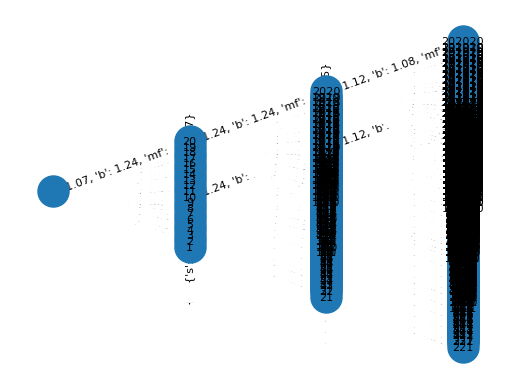

Error code 20001: Variable not in model


AttributeError: Unable to retrieve attribute 'ObjVal'

In [26]:
M = 2
import numpy as np
import random
# m.read('test.sol')
# x.varName= x.X
# phaseOneSampleSize = 100
solutions = []
objVals = []
random.seed(1)
for i in range(M):
    d = original()
    objVal = getExpectedObjectiveValue(d)
    objVals.append(objVal)
    
print("estimated mean of upper bound: ", np.average(objVals))

In [ ]:
import statistics
import math
from scipy import stats

CI_ub = stats.t.interval(alpha=0.95, loc=np.mean(objVals), df=len(objVals)-1, scale=stats.sem(objVals))
print('Confidence Interval for upper bound: ', CI_lb)
print('Width for upper bound confidence interval: ', round((CI_lb[1] - CI_lb[0]),2))